In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('updatedDatasets/Update3.csv',index_col='Respondent')

In [3]:
df['Country'].nunique()

201

In [4]:
country_groupby = df.groupby('Country')

In [5]:
country_avaerage_salary = pd.DataFrame(country_groupby['Salary'].mean())
country_avaerage_salary.sort_values('Salary',ascending=False).head()

,Salary
Country,
Bermuda,150000.000000
Anguilla,100000.000000
American Samoa,98128.097477
Burundi,98128.097477
Libya,87996.924975


In [6]:
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode,plot ,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [7]:
data = dict(type='choropleth',
       locations=country_avaerage_salary.index,
       locationmode='country names',
       z = country_avaerage_salary['Salary'],
       colorbar = {'title':'Average Salary'})

In [8]:
layout = dict(title='Average Salary per country',
             geo = dict(showframe=False,
                       projection={'type':'natural earth'}))

In [9]:
choromap = go.Figure(data= [data],layout=layout)

In [10]:
iplot(choromap)

<AxesSubplot:xlabel='Salary', ylabel='Country'>

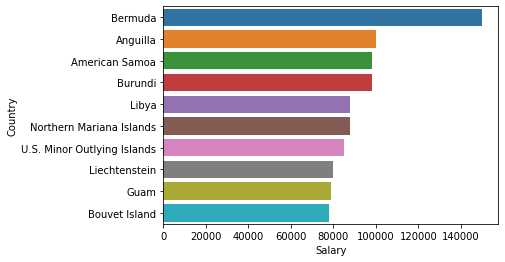

In [11]:
temp = country_avaerage_salary.sort_values('Salary',ascending=False).head(10)
sns.barplot(x=temp['Salary'],y=temp.index)

In [12]:
country = pd.DataFrame(df.Country.value_counts())
country.sort_values('Country',ascending=False).head()

,Country
United States,11455
India,5197
United Kingdom,4395
Germany,4143
Canada,2233


<AxesSubplot:xlabel='Country'>

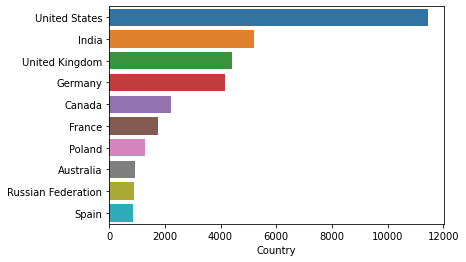

In [13]:
temp = country.sort_values('Country',ascending=False).head(10)
sns.barplot(x=temp['Country'],y=temp.index)

In [14]:
data = dict(type='choropleth',
       locations=country.index,
       locationmode='country names',
       z = country['Country'],
       text = country.index,
       colorbar = {'title':'Developer count'})

In [15]:
layout = dict(title='Developers per country',
             geo = dict(showframe=False,
                       projection={'type':'natural earth'}))

In [16]:
choromap2 = go.Figure(data= [data],layout=layout)
iplot(choromap2)

In [17]:
data = dict(type='choropleth',
       locations=country_groupby['Salary'].mean().index,
       locationmode='country names',
       z = country_groupby['JobSatisfaction'].mean(),
       colorbar = {'title':'Job Satisfaction'})
layout = dict(title='Average Job Satisfaction per Country',
             geo = dict(showframe=False,
                       projection={'type':'natural earth'}))
choromap3 = go.Figure(data= [data],layout=layout)
iplot(choromap3)

In [18]:
data = dict(type='choropleth',
       locations=country_groupby['Salary'].mean().index,
       locationmode='country names',
       z = country_groupby['CareerSatisfaction'].mean(),
       colorbar = {'title':'Country count'})
layout = dict(title='Average Career Satisfaction per Country',
             geo = dict(showframe=False,
                       projection={'type':'natural earth'}))
choromap4 = go.Figure(data= [data],layout=layout)
iplot(choromap4)